In [5]:
import numpy as np
from PIL import Image

In [29]:
size = 512

canvas = np.sin(np.arange(size) * 2 * np.pi / 15) * 255

canvas = np.stack([canvas] * size)

canvas = canvas + canvas.T

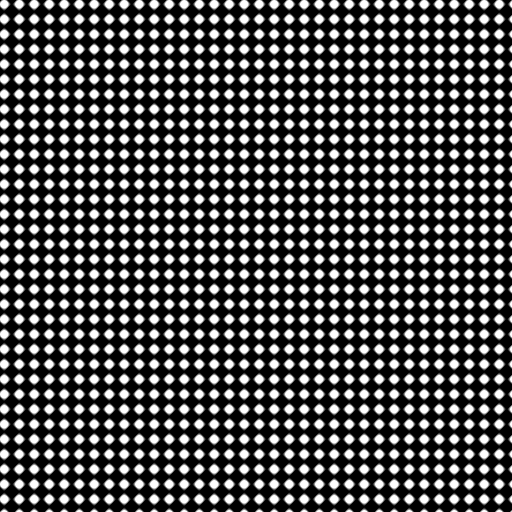

In [30]:
def display(img_array):
    img_array = img_array.copy()
    img_array[img_array > 255] = 255
    img_array[img_array < 0] = 0
    return Image.fromarray(np.uint8(img_array))

display(canvas)

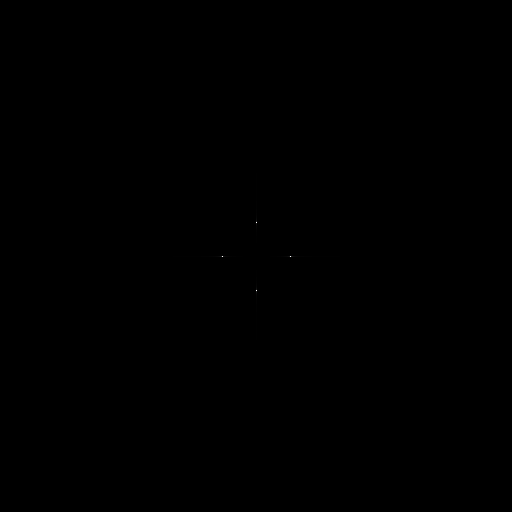

In [31]:
gaussian2d_fft = np.abs(np.fft.fftshift(np.fft.fft2(canvas)))

gaussian2d_fft -= np.min(gaussian2d_fft)
gaussian2d_fft /= np.max(gaussian2d_fft)
gaussian2d_fft *= 255


display(gaussian2d_fft)

In [32]:
gaussian2d_fft.shape

(512, 512)

In [33]:
half_size = size // 2
2/((half_size - np.argmax(gaussian2d_fft[half_size][:half_size])) / half_size)

15.058823529411764

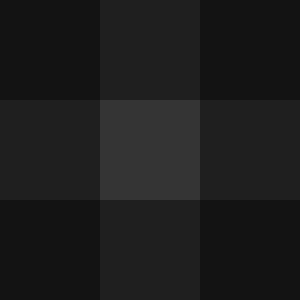

In [18]:
kernel_size = 3
sigma = 1
gaussian2d = cv2.getGaussianKernel(kernel_size, sigma) @ cv2.getGaussianKernel(kernel_size, sigma).T


stretch = 100
displayed_gaussian = np.repeat(np.repeat(gaussian2d, stretch, axis=0), stretch, axis=1) * 255
display(displayed_gaussian)

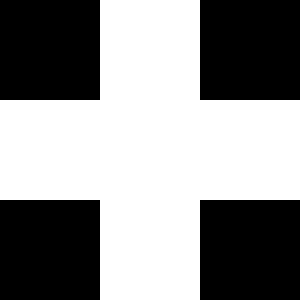

In [20]:
gaussian2d_fft = np.abs(np.fft.fftshift(np.fft.fft2(gaussian2d)))

gaussian2d_fft -= np.min(gaussian2d_fft)
gaussian2d_fft /= np.max(gaussian2d_fft)
gaussian2d_fft *= 255


display(gaussian2d_fft)

displayed_gaussian_fft = np.repeat(np.repeat(gaussian2d_fft, stretch, axis=0), stretch, axis=1) * 255
display(displayed_gaussian_fft)